# Vamos entender o significado de ESCALA e PADRONIZAÇÃO dos dados

ESCALA (scaling)- Significa alterar o intervalo de valores, mas sem alterar a forma de distribuição. O intervalo geralmente é definido como 0 a 1.
     
PADRONIZAR  (standardizing) - Significa alterar os valores para que o desvio padrão da distribuição da média seja igual a um, a saída será muito próxima da distribuição normal.
     
NORMALIZAR (normalize) - Na literatura, vai encontrar esta palavra sendo utilizada para qualquer um dos contextos acima, então pode ser uma confusão usar normalizar. Em geral, normalizar significa transformar a sua distribuição em uma distribuição normal, ou seja, padronizar.



Recomendo a leitura do tutorial do scikit learn em 

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py




Para entender o significado de cada forma de pré-processamento dos seus dados, vamos criar quatro distribuições com características diferentes:

* beta: com obliquidade negativa
* exponencial: com obliquidade positiva
* normal_p: normal
* normal_l: normal

In [11]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [12]:
# Para reproducilidade
np.random.seed(13)

In [13]:
df = pd.DataFrame({
    'beta':np.random.beta(4,2,900)*60,  #beta
    'exponencial':np.random.exponential(9,900), #expo
    'normal_p':np.random.normal(10,2,900), #platykurtic 
    'normal_l': np.random.normal(10,10,900), #leptokurtic 
})

In [14]:
col_names = list(df.columns)
print(col_names)

['beta', 'exponencial', 'normal_p', 'normal_l']


Aqui os valores estão em uma escala aproximadamente semelhante, como podemos ver no plot abaixo:

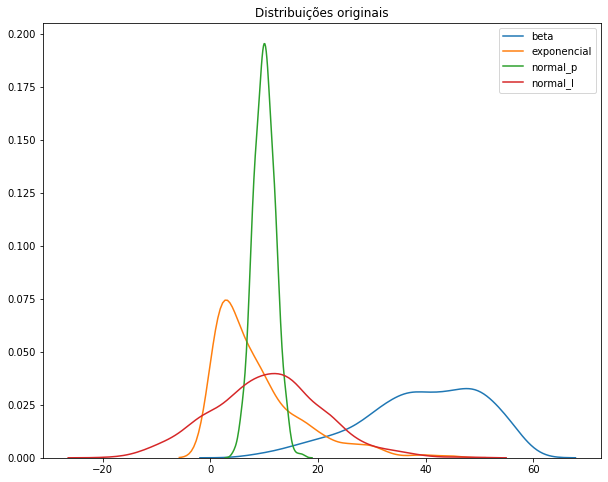

In [15]:
#KDE plot

fig,(ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Distribuições originais')

sns.kdeplot(df['beta'],ax=ax1)
sns.kdeplot(df['exponencial'],ax=ax1)
sns.kdeplot(df['normal_p'],ax=ax1)
sns.kdeplot(df['normal_l'],ax=ax1)

# Conhecendo as ferramentas de pré-processamento do scikit learn

## MinMaxScaler

MinMaxScaler subtrai o valor mínimo do atributo e depois divide pelo intervalo. O intervalo é a diferença entre o máximo original e o mínimo original.

MinMaxScaler preserva a forma da distribuição original. Não altera significativamente as informações incorporadas nos dados originais.

Observe que o MinMaxScaler não reduz a importância dos valores discrepantes (outliars).

O intervalo padrão para o atributo retornado pelo MinMaxScaler é de 0 a 1.

Aqui está o kdeplot após a aplicação do MinMaxScaler.

In [6]:
mm=preprocessing.MinMaxScaler()
df_mm=mm.fit_transform(df)

df_mm=pd.DataFrame(df_mm,columns=col_names)

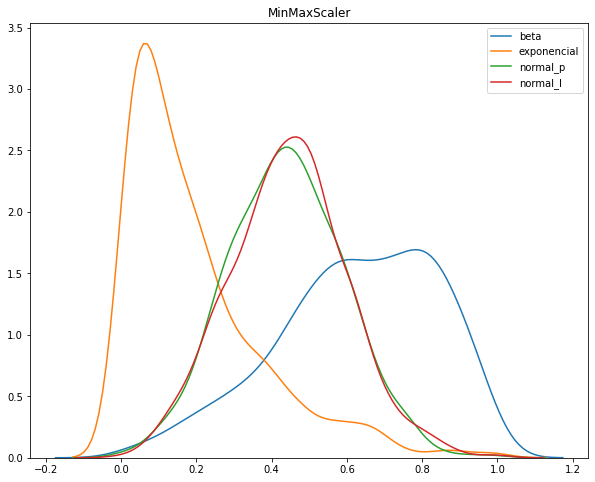

In [7]:
fig,ax2=plt.subplots(ncols=1,figsize=(10,8))
ax2.set_title("MinMaxScaler")
sns.kdeplot(df_mm['beta'],ax=ax2)
sns.kdeplot(df_mm['exponencial'],ax=ax2)
sns.kdeplot(df_mm['normal_p'],ax=ax2)
sns.kdeplot(df_mm['normal_l'],ax=ax2)

## Robust Scaler

O RobustScaler transforma o vetor de atributos subtraindo a mediana e, em seguida, dividindo pelo intervalo interquartil (valor de 75% — valor de 25%).

Observe que o RobustScaler não dimensiona os dados em um intervalo predeterminado como MinMaxScaler. Não atende à definição estrita de escala que apresentei anteriormente.

Observe que o intervalo para cada atirbuto após a aplicação do RobustScaler é maior do que para o MinMaxScaler.

Use RobustScaler se quiser reduzir os efeitos de outliers, em relação ao MinMaxScaler.

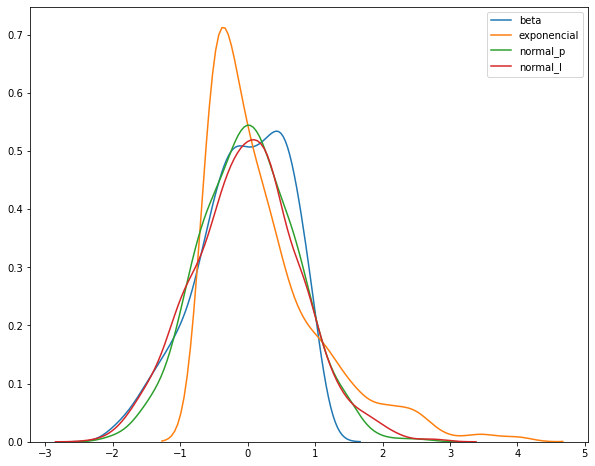

In [8]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r,columns=col_names)

fig, (ax3) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title( 'RobusScaler')

sns.kdeplot(df_r['beta'], ax=ax3)
sns.kdeplot(df_r['exponencial'], ax=ax3)
sns.kdeplot(df_r['normal_p'],ax=ax3)
sns.kdeplot(df_r['normal_l'],ax=ax3)

## Standard Scaler

StandardScaler padroniza um atributo subtraindo a média e, em seguida, dimensionando para a variância unitária. A variância unitária significa dividir todos os valores pelo desvio padrão. O StandardScaler não atende à definição estrita de escala que apresentei anteriormente.

StandardScaler resulta em uma distribuição com um desvio padrão igual a 1. A variância é igual a 1 também, porque variância = desvio padrão ao quadrado. E 1 ao quadrado = 1.

StandardScaler torna a média da distribuição 0. Cerca de 68% dos valores estarão entre -1 e 1.

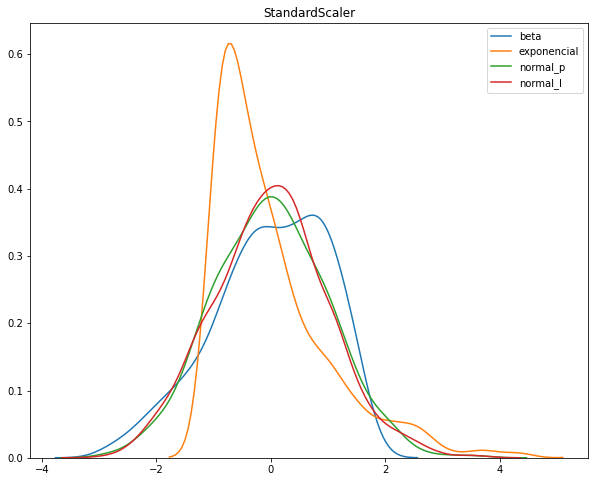

In [9]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s,columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title( 'StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponencial'], ax=ax1)
sns.kdeplot(df_s['normal_p'],ax=ax1)
sns.kdeplot(df_s['normal_l'],ax=ax1)

## Normalizer

Atenção: O normalizer funciona nas linhas, não nas colunas!  É fácil perder essa informação nos documentos.

Por padrão, a normalização L2 é aplicada a cada observação para que os valores em uma linha tenham norma unitária. A norma unitária em L2 significa que se cada elemento fosse elevado ao quadrado e somado, o total seria igual a 1. Alternativamente, a normalização L1 (também conhecida como táxi ou Manhattan) pode ser aplicada em vez da normalização L2.

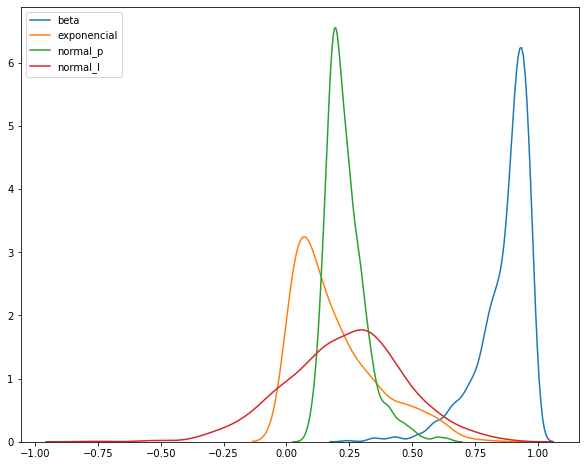

In [10]:
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(df)

df_n = pd.DataFrame(df_n, columns=col_names)

fig, (ax2) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title( 'Normalizer')

sns.kdeplot(df_n['beta'], ax=ax2)
sns.kdeplot(df_n['exponencial'], ax=ax2)
sns.kdeplot(df_n['normal_p'],ax=ax2)
sns.kdeplot(df_n['normal_l'],ax=ax2)

# Conclusões

* MinMaxScaler : transformar um atributo preservando sua distribuição

* RobustScaler : quando precisar reduzir efeitos dos outliers

* StandardScaler : quando precisar de uma distribuição relativamente normal. Por exemplo, alguns algoritmos (como o kernel RBF de Support Vector Machines ou os regularizadores L1 e L2 de modelos lineares) assumem que todos os atributos estão centrados em 0 e têm variância na mesma ordem. Se um atirbuto tem uma variância que é ordens de magnitude maior do que outros, ele pode dominar a função objetivo e tornar o estimador incapaz de aprender com outros recursos corretamente como esperado.

* Normalizer : é frequentemente utilizado em operações de classificação de textos. 
